In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sympy import sieve, prime
import itertools
import pandas as pd

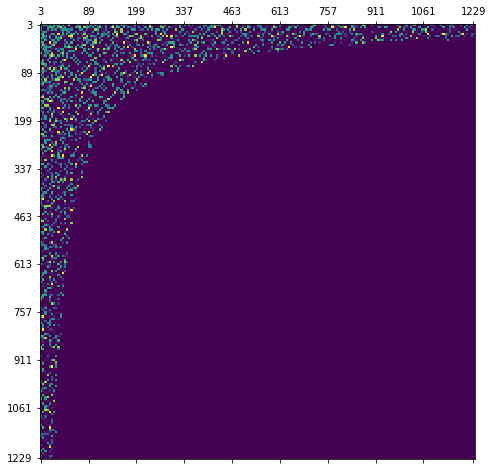

In [5]:
matrix_size = 200
matrix = np.zeros((matrix_size, matrix_size))

with open('C:/Users/esultano/git/elliptic_curves/data/elliptic_curves.csv') as f:
    for line in f.readlines():
        line = line.strip()
        p, q, cases = eval(line)
        idx_p = sieve.search(p)[0]-2
        idx_q = sieve.search(q)[0]-2
        if idx_p < matrix_size and idx_q < matrix_size:
            cases_set = set()
            for case in cases:
                cases_set.add(case[0])
            cases_list = list(cases_set)
            val = sum(i*i for i in cases_list)
            matrix[idx_p,idx_q] = val
            matrix[idx_q,idx_p] = val

max_prime = prime(matrix_size+2)
axis_labels = list(enumerate(sieve.primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
matrix_plot = ax.matshow(matrix, interpolation='nearest')
#fig.colorbar(matrix_plot)
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels)
plt.show()